# Mini Text-to-Gloss Classification (ISL_CLSRT)

This notebook demonstrates a **simple text classification pipeline** using logistic regression on ISL_CLSRT gloss data. It uses basic TF-IDF features and trains a classifier to predict the first word in the gloss as a simple classification target.


In [ ]:
# !pip install scikit-learn pandas


In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df = pd.read_csv('/content/drive/MyDrive/IETGenAI-SLT/Chapter 4/isl_train_meta_cleaned.csv')
df[['Sentences', 'cleaned_gloss']].head()


,Sentences,cleaned_gloss
0,it does not make any difference to me,MAKE DIFFERENCE
1,tell me truth,TELL TRUTH
2,do me a favour,FAVOUR
3,do not worry,WORRY
4,do not abuse him,ABUSE


In [4]:
# Extract first gloss token as classification label
df['label'] = df['cleaned_gloss'].apply(lambda x: x.split()[0] if isinstance(x, str) and len(x.split()) > 0 else 'UNKNOWN')
df[['cleaned_gloss', 'label']].head()


,cleaned_gloss,label
0,MAKE DIFFERENCE,MAKE
1,TELL TRUTH,TELL
2,FAVOUR,FAVOUR
3,WORRY,WORRY
4,ABUSE,ABUSE


In [8]:
X_train, X_test, y_train, y_test = train_test_split(df['Sentences'], df['label'], test_size=0.2, random_state=42)

In [9]:
vectorizer = TfidfVectorizer()
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

In [10]:
classifier = LogisticRegression(max_iter=1000)
classifier.fit(X_train_tfidf, y_train)


LogisticRegression(max_iter=1000)

In [11]:
y_pred = classifier.predict(X_test_tfidf)
print(classification_report(y_test, y_pred))


                 precision    recall  f1-score   support

          ABUSE       1.00      1.00      1.00         1
         AFRAID       1.00      1.00      1.00         2
          AGREE       0.00      0.00      0.00         1
          ANGRY       1.00      1.00      1.00         1
       ANYTHING       1.00      1.00      1.00         1
            BAD       1.00      1.00      1.00         2
           CAME       0.00      0.00      0.00         3
           COMB       1.00      1.00      1.00         1
CONGRATULATIONS       1.00      1.00      1.00         2
         CRYING       1.00      1.00      1.00         2
        DILEMMA       1.00      1.00      1.00         1
   DISAPPOINTED       1.00      1.00      1.00         2
        ENJOYED       1.00      1.00      1.00         1
         FAVOUR       1.00      1.00      1.00         1
           FINE       1.00      1.00      1.00         1
           FOOD       1.00      1.00      1.00         2
           FREE       1.00    

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


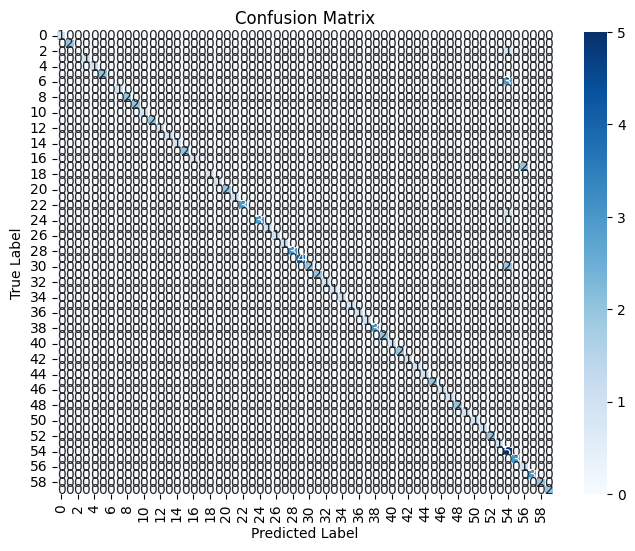

In [12]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


### Summary

This notebook shows a **minimal working example** of text-to-gloss classification using TF-IDF features and logistic regression, suitable for educational demonstrations in low-resource sign language pipelines.


# Task
Create a complete notebook that demonstrates how to perform text-to-gloss classification using a generative AI model on the "ISL_CLSRT" dataset.

## Install necessary libraries

### Subtask:
Install libraries required for using a generative AI model (e.g., `transformers`, `torch` or `tensorflow`).


**Reasoning**:
The subtask requires installing the `transformers` and `torch` libraries. These installations should be done using pip in a separate cell with magic commands.



In [13]:
%pip install transformers torch

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 52.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 32.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 47.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 7.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 127.9/127.9 MB 98.6 MB/s eta 0:00:01
ERROR: Operation cancelled by user


KeyboardInterrupt: 